# Welcome! To Code execution testing colab for Data Analysis Tasks!


In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive




---



**AFTER THIS POINT YOU CAN START WORKING**

---








Using the uploaded dataset, please make a

From the given csv file, please create a nested pie chart of the shots by team. In the inner pie show the team and the total shots and in the outer pie classify the shot depending if they were on target or off target. For the outer pie color the slices in red for off target and green for on target and show it in a legend located in the best possible position. Use the actual numnber of shots instead of percentage as labels for each slice.

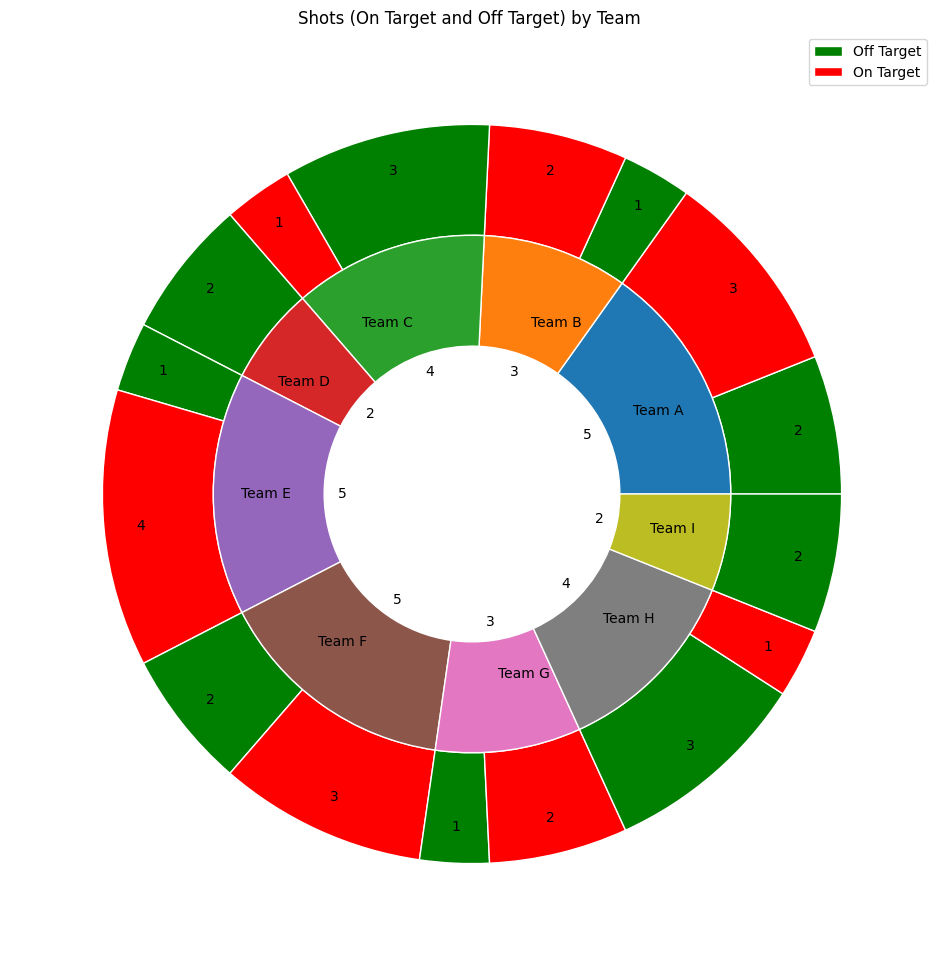

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_111football_match_data.csv")

# Select relevant columns
df = df.loc[:, ["Home Team", "Shots on Target", "Shots Off Target"]]

# Rename columns for clarity
df = df.rename(columns={"Shots on Target": "On Target", "Shots Off Target": "Off Target"})

# Reshape the data using melt
df = df.melt(id_vars=["Home Team"],
             var_name="Type",
             value_name="Shots").sort_values(["Home Team", "Type"])

# Group by team and type, and compute sums
inner = df.groupby("Home Team").sum(numeric_only=True)
outer = df.groupby(["Home Team", "Type"]).sum(numeric_only=True)

# Filter out rows with zero shots
outer = outer[outer['Shots'] > 0]

# Extract type labels for outer pie chart
outer_labels = outer.index.get_level_values(1)

# Create the pie chart
fig, ax = plt.subplots(figsize=(24, 12))
size = 0.3

# Colors for outer pie chart segments
colors = {'On Target': 'red',
          'Off Target': 'green'}

def autopct_format(values):
    """
    Custom function to format pie chart labels as total counts.
    """
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

# Inner pie chart
ax.pie(inner.values.flatten(), radius=1 - size,
       labels=inner.index,
       autopct = autopct_format(outer['Shots'].values.flatten()),
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.5, labeldistance=0.7)

# Outer pie chart
ax.pie(outer['Shots'].values.flatten(), radius=1, colors=[colors[v] for v in outer_labels.tolist()],
       wedgeprops=dict(width=size, edgecolor='w'), autopct = autopct_format(outer['Shots'].values.flatten()), pctdistance=0.9,)

# Set title and legend
ax.set(title='Shots (On Target and Off Target) by Team ')
plt.legend(df['Type'].unique(), loc="best")

# Show the plot
plt.show()

Sure, here is the nested pie chart of the total number of shots grouped by type fot each team:

[image of the query]

I hope it helps!


Ineed a bar stacked plot with two sets of bars for each team. One set for shots on target and the other for shots off target, put the off target set at the bottom. Add a legend for each type of shot and an appropriate title. Use the 'data_111football_match_data.csv' dataset.

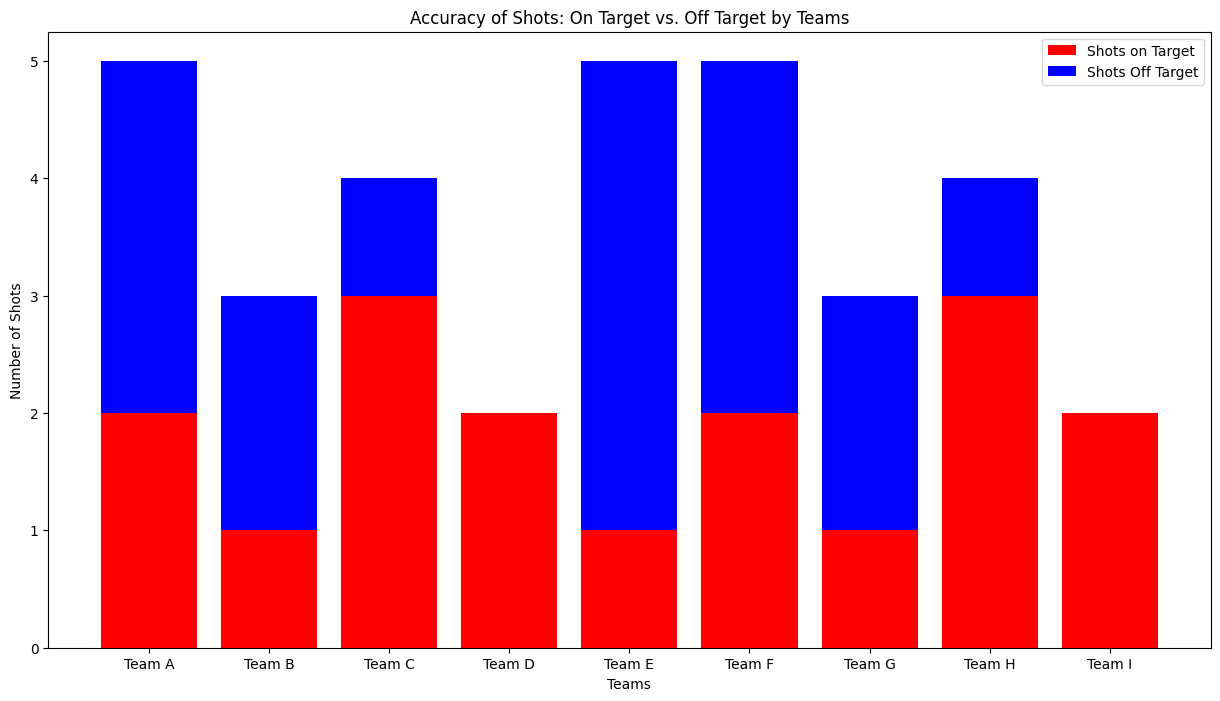

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_111football_match_data.csv")

# Create a new figure
fig = plt.figure(figsize=(15,8))

# Create stacked bar plot for shots on target and off target
plt.bar(df['Home Team'].values, df['Shots Off Target'].values, color='r')
plt.bar(df['Home Team'], df['Shots on Target'], bottom=df['Shots Off Target'], color='b')

# Set labels and title
plt.xlabel("Teams")
plt.ylabel("Number of Shots")
plt.title("Accuracy of Shots: On Target vs. Off Target by Teams")

# Add legend
plt.legend(['Shots on Target', 'Shots Off Target'])

# Show the plot
plt.show()


From this dataset, please create a bar plot for each nutrient value by food, one on top of the other. Set an appropriate title an y axis label for each bar plot but only one x axis for all of them. Use a differnt bar color for diffent foods. Ignore nutrients where the value is 0 for all the foods.

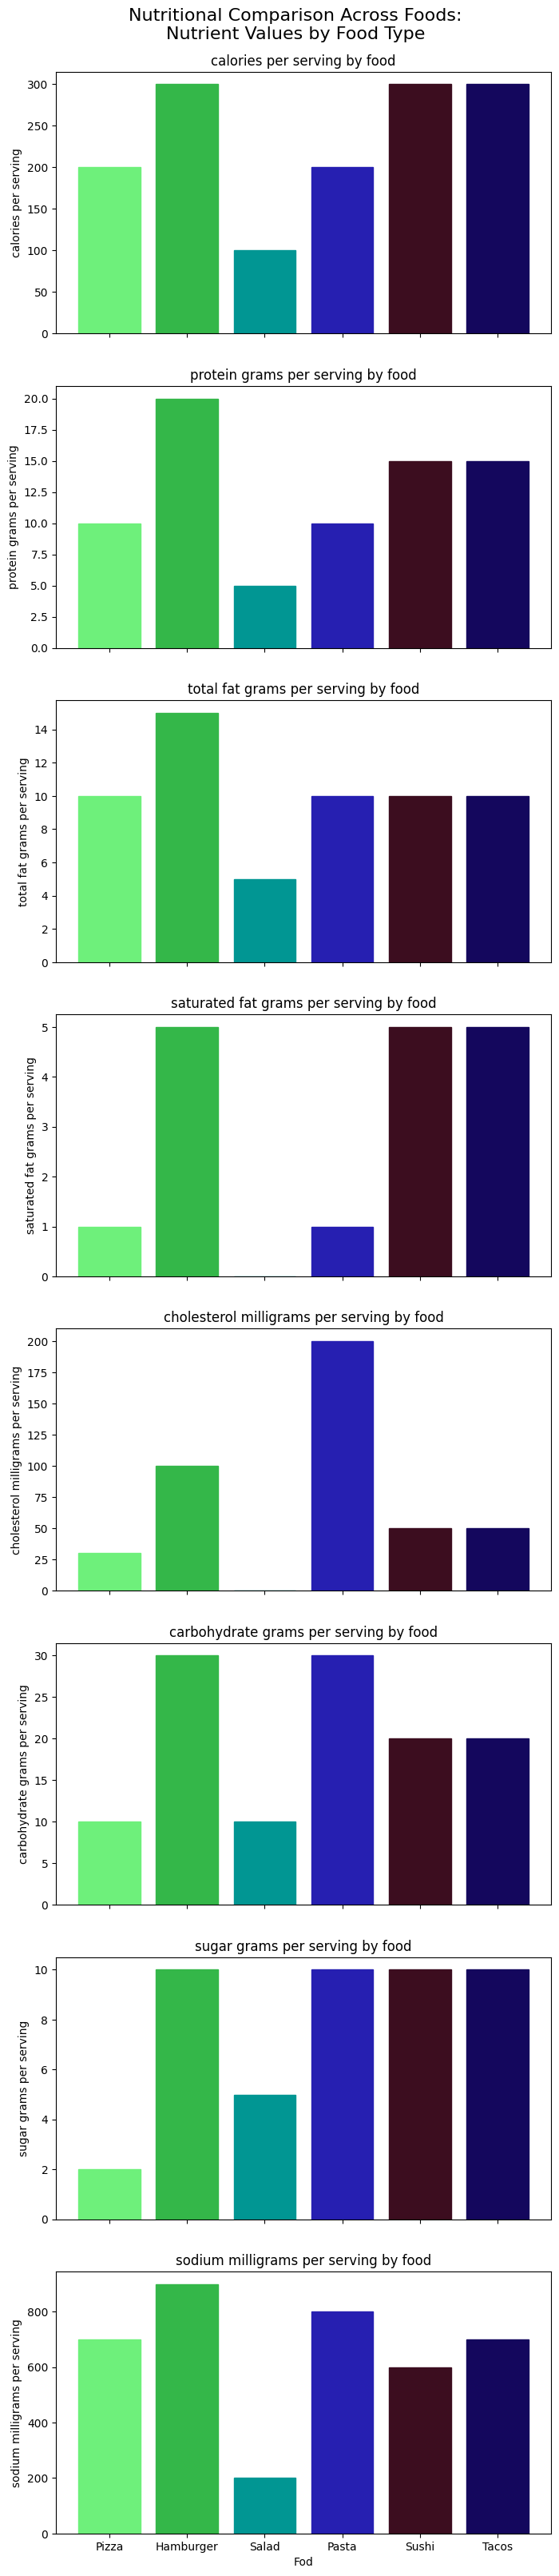

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_112food_nutrition_data.csv")

# List to store columns with integer data type
y_columns = []

# Identify columns with integer data type and with at least one value greater than 0
for col, col_type in df.dtypes.items():
    if col_type == "int64" and df[col].sum() > 0:
        y_columns.append(col)

# Create subplots for each selected column
fig, ax = plt.subplots(nrows=len(y_columns), ncols=1, figsize=(8, 40), sharex=True)

# Extract unique food items and generate random colors list
foods = df['food'].unique()
hexadecimal_alphabets = '0123456789ABCDEF'
colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(len(foods))]

# Create bar plots for each food in subplots
for idx, column in enumerate(y_columns):
    bars = ax[idx].bar(df['food'], df[column])
    ax[idx].set_title(column + ' by food')
    ax[idx].set(ylabel=column)
    for i in range(len(colors)):
        bars[i].set_color(colors[i])

# Set labels and title
fig.suptitle("Nutritional Comparison Across Foods:\nNutrient Values by Food Type", fontsize=16, y=0.90)
plt.xlabel("Fod")

# Show the plot
fig.savefig('aaaa.png')
plt.show()

I have this data:
country_name	geographic_region_name	sub_region_name	cases_per_100k	total_cases	year
United States	North America	North America	1000	10000000	2023
China	Asia	East Asia	500	5000000	2023
India	Asia	South Asia	250	2500000	2023
Brazil	South America	South America	100	1000000	2023
Russia	Europe	Eastern Europe	50	500000	2023
Please create a pie chart of the distribution of cases by country reporteed in Asia in 2023.

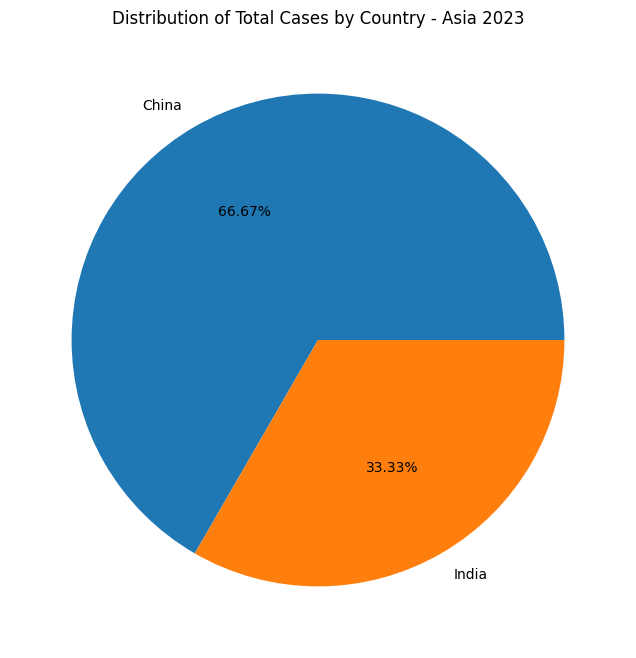

In [ ]:
import pandas
import matplotlib.pyplot as plt

# Create a pandas dataframe from the data
df = pd.DataFrame({'country_name': ['United States', 'China', 'India', 'Brazil', 'Russia'],
                   'geographic_region_name': ['North America', 'Asia', 'Asia', 'South America', 'Europe'],
                   'sub_region_name': ['North America', 'East Asia', 'South Asia', 'South America', 'Eastern Europe'],
                   'cases_per_100k': [1000, 500, 250, 100, 50],
                   'total_cases':[10000000, 5000000, 2500000, 1000000, 500000],
                   'year': [2023, 2023, 2023, 2023, 2023]})

# Filter data by year and regiom
df = df[(df['year'] == 2023) & (df['geographic_region_name'] == 'Asia')]

# Create a new figure
fig = plt.figure(figsize=(15,8))

# Create a pie chart
plt.pie(df['total_cases'], labels=df['country_name'], autopct='%1.2f%%')

# Set title
plt.title('Distribution of Total Cases by Country - Asia 2023')

# Display the plot
plt.show()

Sure, here you have a pie chart of the distribution of total cases reported in Asia in 2023

[image of the query]

I hope it helps!

From the dataset 'data_46covid_data.csv' please create one pie chart for each region. In each pie chart show the distribution of total cases per country in 2023. Add an appropriate title to each pie and also a global title. Display the percentage and label in each slice and do not add any label. For regions with more than 5 countries display only the top 5 countries with most cases and geoup the other ones in a single label.

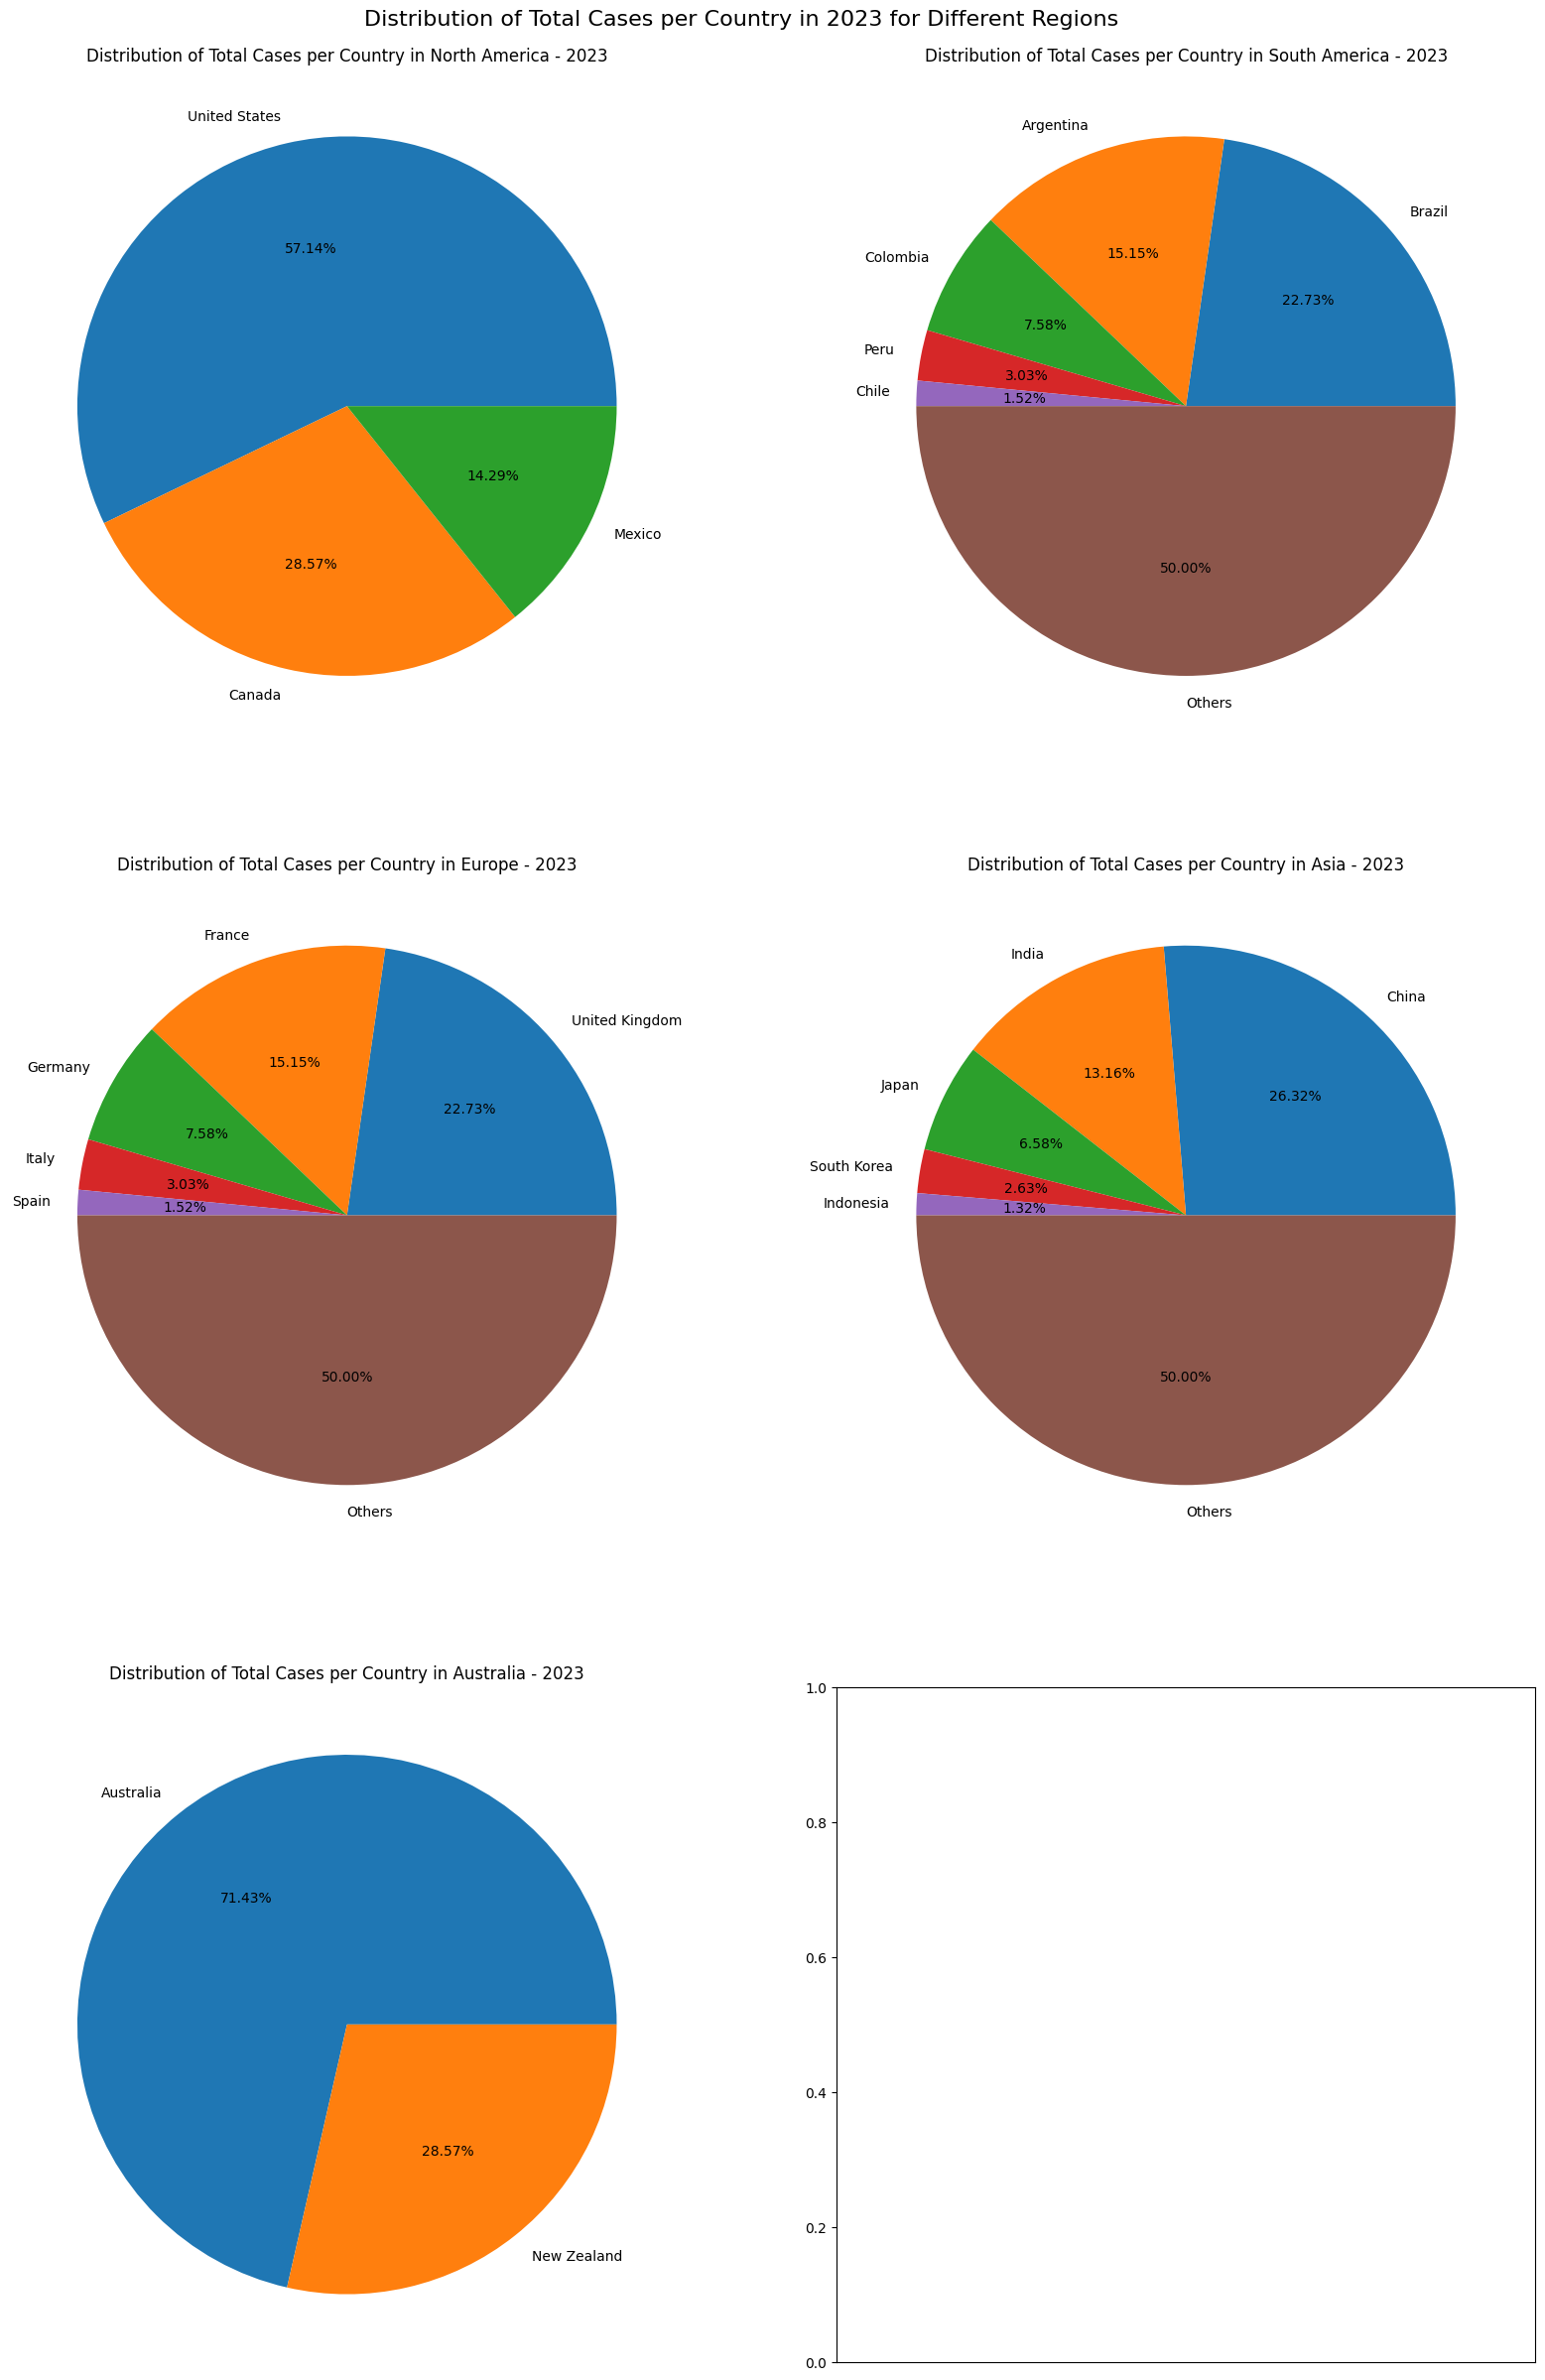

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_46covid_data.csv")

# Filter data for the year 2023 and select relevant columns
df = df.loc[df['year'] == 2023, ['country_name', 'region_name', 'total_cases']]

# Get unique regions
regions = df['region_name'].unique()

# Create subplots for each region
fig, ax = plt.subplots(nrows=(len(regions) + 1) // 2, ncols=2, figsize=(20, 30), sharex=True)

# Iterate over regions
for idx, region in enumerate(regions):
    # Filter data for the current region and sort by total cases
    df_region = df.loc[df['region_name'] == region].sort_values('total_cases', ascending=False).reset_index(drop=True)

    # If there are more than 5 countries, combine smaller countries into "Others" category
    if df_region.shape[0] > 5:
        total_cases_others = df_region.loc[:, 'total_cases'].iloc[:5].sum()
        row_others = {'country_name': 'Others', 'region_name': region, 'total_cases': total_cases_others}
        df_region = df_region.iloc[:5]
        df_region.loc[6] = row_others

    # Create a pie chart for the current region
    ax[idx // 2, idx % 2].pie(df_region['total_cases'], labels=df_region['country_name'], autopct='%1.2f%%')
    ax[idx // 2, idx % 2].set_title("Distribution of Total Cases per Country in %s - 2023" % region)

# Set title and layout
fig.suptitle("Distribution of Total Cases per Country in 2023 for Different Regions", fontsize=16, y=0.90)

# Save and display the plot
fig.savefig('distribution_cases.png')
plt.show()


Of course! Here you have a pie chart of the distribution of total cases by country reported in 2023 for each region.

[image of the query]

I hope it helps!

From the given dataset please elaborate a bar plot of the distribution of total sales across all the stores grouped by tupe of day of the week (if it is a week day or weekend)

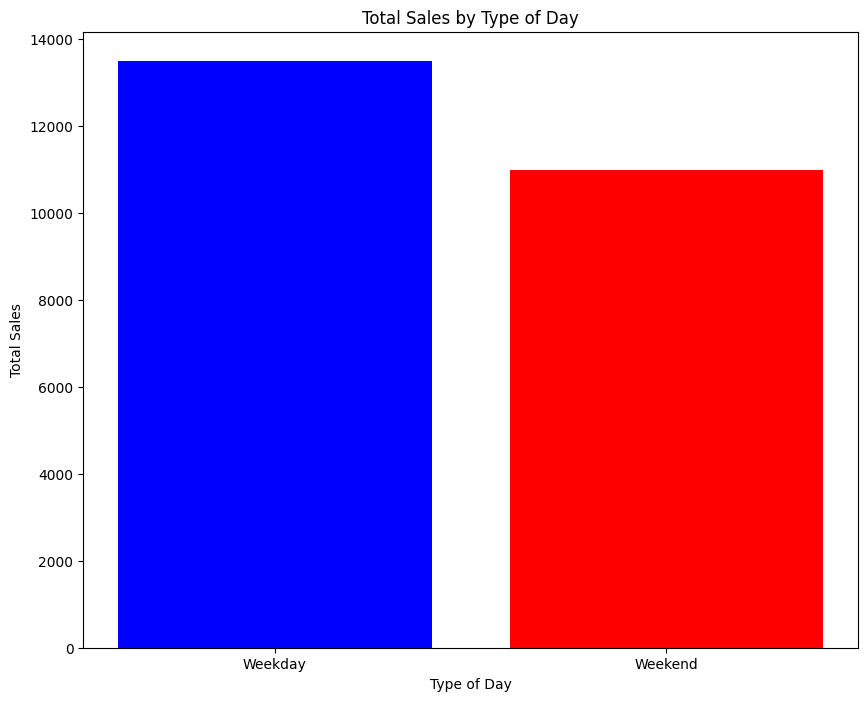

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_31store_data.csv")

# Define weekend days
weekend_days = ['Saturday', 'Sunday']

# Create a new column indicating if the day is a weekend
df['is_weekend'] = df['day_of_week'].isin(weekend_days)

# Create a new figure
fig = plt.figure(figsize=(10, 8))

# Create a stacked bar plot for total sales on weekends and weekdays
plt.bar(['Weekend' if is_weekend else 'Weekday' for is_weekend in df['is_weekend'].values], df['total_sales'].values, color=['red', 'blue'])

# Set labels and title
plt.xlabel("Type of Day")
plt.ylabel("Total Sales")
plt.title("Total Sales by Type of Day")

# Show the plot
plt.show()

Of course! Here you have a bar plot of the distribution of total sales across all the stores by type of day of the week.

[image of the query]

I hope it helps!

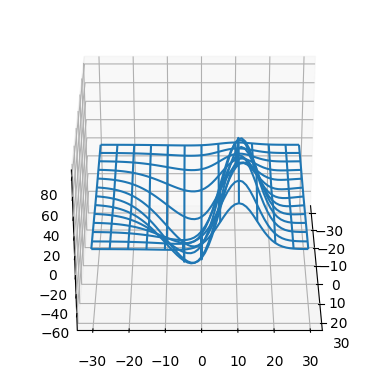

In [ ]:

# Implementation of matplotlib function
from matplotlib.artist import Artist
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride = 5,
                  cstride = 5)

for angle in range(0, 90):
    ax.view_init(30, angle)
    fig.canvas.draw()
    renderer = fig.canvas.renderer
    Artist.draw(ax, renderer)
    plt.pause(.001)

    fig.suptitle('matplotlib.artist.Artist.draw() function Example')
ax.grid()

plt.show()

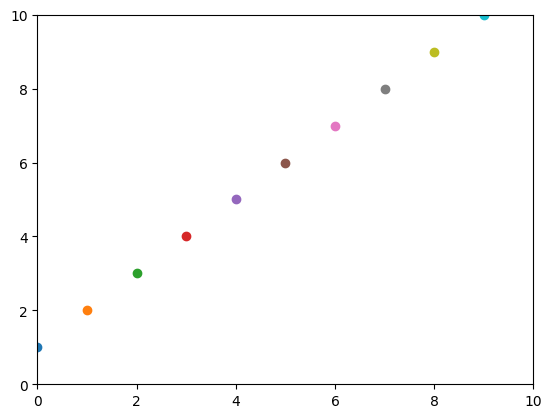

In [ ]:
import matplotlib.pyplot as plt

from IPython import display
from time import sleep

plt.axis([0, 10, 0, 10])
for i in range(10):
    plt.scatter(i, i + 1)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.5)

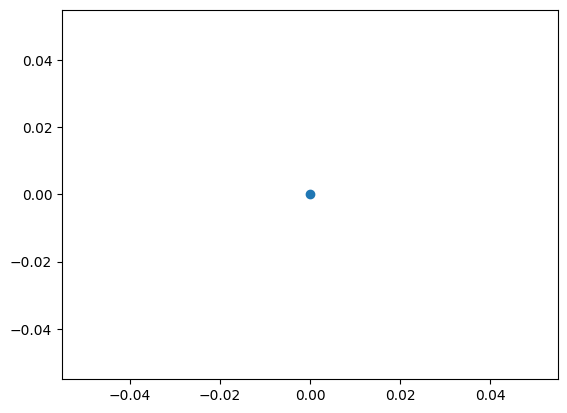

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

fig = plt.figure()
ax = fig.add_subplot(111)

# some X and Y data
x = [0]
y = [0]

li, = ax.plot(x, y,'o')

# draw and show it
fig.canvas.draw()
plt.show(block=False)

# loop to update the data
for i in range(100):
    try:
        x.append(i)
        y.append(i)

        # set the new data
        li.set_xdata(x)
        li.set_ydata(y)

        ax.relim()
        ax.autoscale_view(True,True,True)

        fig.canvas.draw()

        time.sleep(0.01)
    except KeyboardInterrupt:
        plt.close('all')
        break

In [ ]:
m=1
F = 1
omega0 = 2
gamma = 0.5
omega = np.linspace(0,10,1000)
B = (F/m)*(omega0**2 - omega**2)/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)
A = (F/m)*gamma*omega/(gamma**2 * omega**2 + (omega0**2 - omega**2)**2)

gamVar = np.linspace(0.6,3.9,20)

for i in range(20):
  Avar = (F/m)*gamVar[i]*omega/(gamVar[i]**2 * omega**2 + (omega0**2 - omega**2)**2)
  plt.figure(0)
  plt.plot(omega,Avar, label = 'Gamma = ' + str(gamVar[i]))
  plt.plot([omega0]*2,[1.1*min(B),1.1*max(A)],'--',color = 'green')
  plt.text(2.02,1,'$\omega_0$',color = 'green')
  plt.grid(True,which = 'major')
  plt.xlabel('$\Omega$')
  plt.xlim([0,4])
  plt.pause(0.1)
  plt.show()



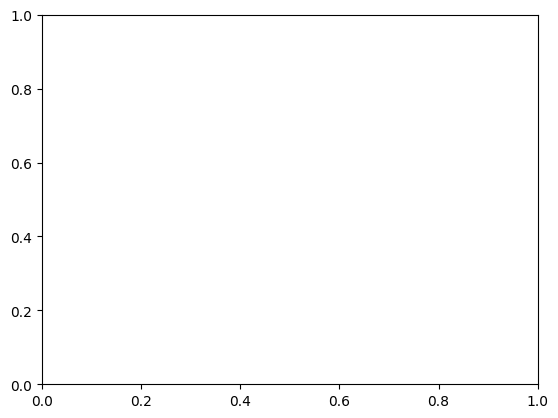

In [ ]:

from matplotlib import animation, rc

rc('animation', html='html5');

fig, ax = plt.subplots()
# ax.set_xlabel('$\Omega$')
# ax.set_xlim([0,4])
# ax.grid(True)
# ax.plot([omega0]*2,[1.1*min(B),1.1*max(A)],'--',color  = 'green', label = 'Frecuencia propia')
# ax.text(2.02,1,'$\omega_0$',color = 'green');

# linea, = ax.plot([],[],'-',color = 'b', label = 'Curva de resonancia')

# def graficar(i):
#   F = 1
#   omega0 = 2
#   gamma = 0.5
#   omega = np.linspace(0,10,1000)
#   gamVar = np.linspace(0.6,3.9,20)
#   Avar = (F/m)*gamVar[i]*omega/(gamVar[i]**2 * omega**2 + (omega0**2 - omega**2)**2)
#   linea.set_data(omega, Avar)
#   return (linea,)
# anim = animation.FuncAnimation(fig, graficar, frames=20, interval=1000)
# anim

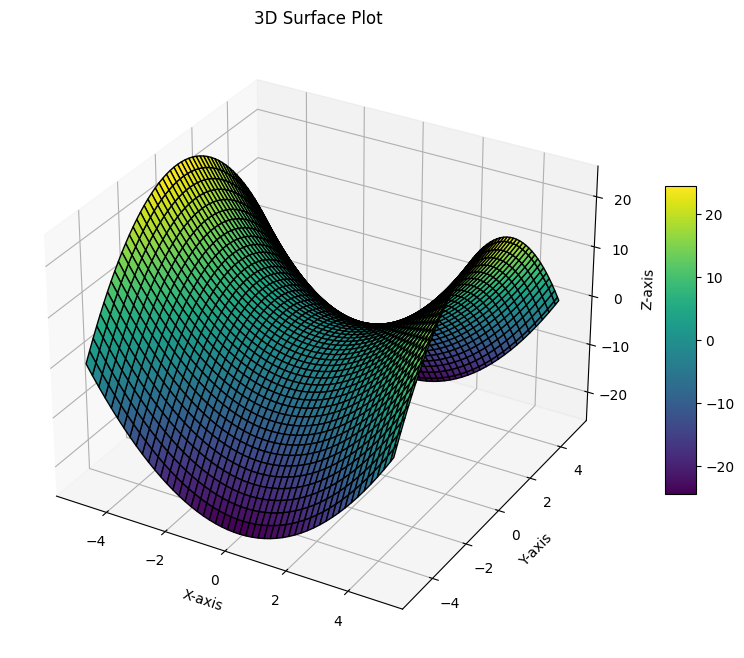

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the Z values using a mathematical function (example: a saddle-shaped function)
Z = X**2 - Y**2

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="k")

# Set labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Surface Plot")

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Show the plot
plt.show()

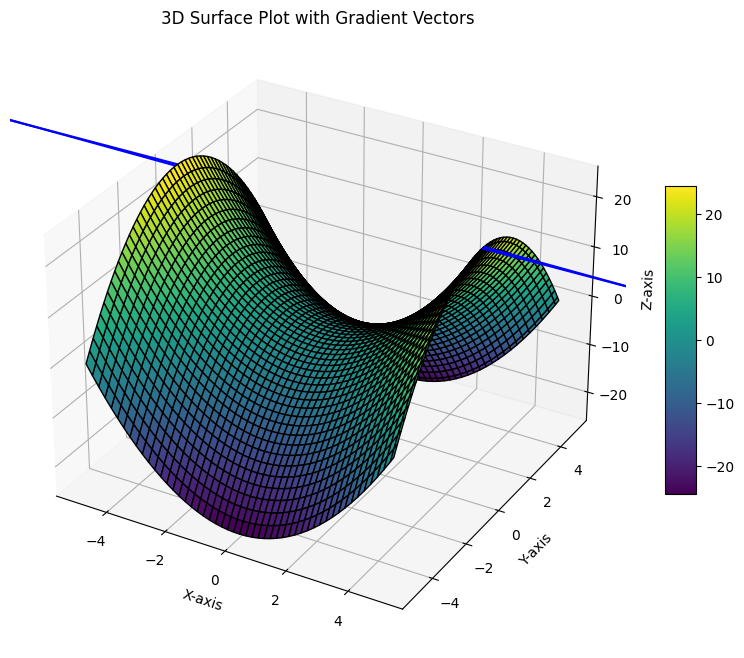

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the Z values using a mathematical function (example: a saddle-shaped function)
Z = X**2 - Y**2

# Calculate gradients in X and Y directions
dZ_dx = 2 * X
dZ_dy = -2 * Y

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="k")

# Set labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Surface Plot with Gradient Vectors")

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Find local minimums and maximums
local_min_indices = np.argwhere(Z == np.min(Z))
local_max_indices = np.argwhere(Z == np.max(Z))

# Add vectors at local minimums and maximums
for idx in local_min_indices:
    ax.quiver(X[idx[0], idx[1]], Y[idx[0], idx[1]], Z[idx[0], idx[1]],
              dZ_dx[idx[0], idx[1]], dZ_dy[idx[0], idx[1]], 0,
              color='r', arrow_length_ratio=0.3)

for idx in local_max_indices:
    ax.quiver(X[idx[0], idx[1]], Y[idx[0], idx[1]], Z[idx[0], idx[1]],
              dZ_dx[idx[0], idx[1]], dZ_dy[idx[0], idx[1]], 0,
              color='b', arrow_length_ratio=0.3)

# Show the plot
plt.show()


Create a 3D plot of the function
Z = X^2 - Y^2   along with the plane Y = 2X + 5 and the intersection line between the surface and the plane. Use different colors to distinguish between the surface, plane, and line, and adds labels, a title, and a color bar for clarity.

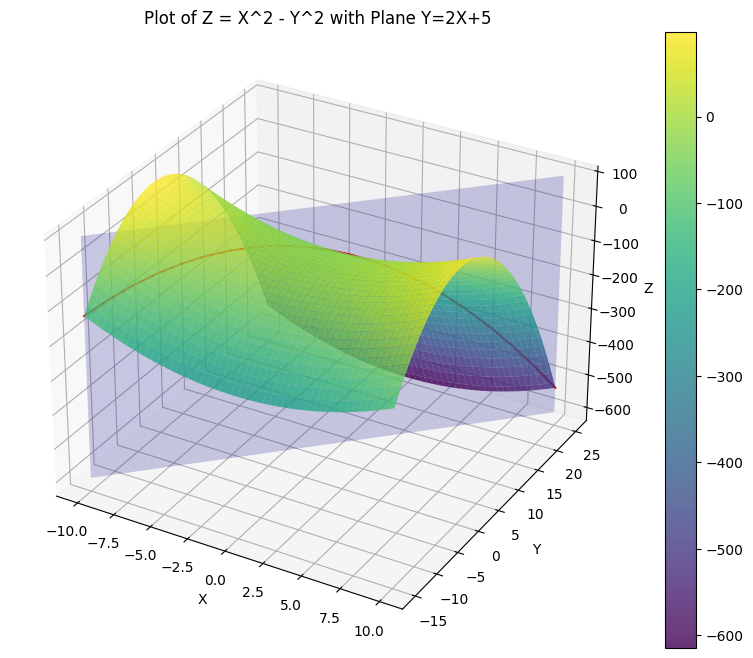

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of X and Y values
X = np.linspace(-10, 10, 100)
Y = np.linspace(-15, 25, 100)
X, Y = np.meshgrid(X, Y)

# Calculate Z values using the function Z = X^2 - Y^2
Z = X**2 - Y**2

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the plane Y=2X + 5
X = np.linspace(-10, 10, 100)
Z = np.linspace(-600, 100, 100)
X, Z = np.meshgrid(X, Z)
Y = 2*X + 5

plane = ax.plot_surface(X, Y, Z, color='blue', alpha=0.2)

# Plot intersenction
X = np.linspace(-10, 10, 21)
Y = [2*x+5 for x in X]
Z = [ X[i]**2 - Y[i]**2 for i in range(len(X))]
line = ax.plot3D(X, Y, Z, color='red')


# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plot of Z = X^2 - Y^2 with Plane Y=2X+5')

# Add a color bar
fig.colorbar(surface)

# Show the plot
plt.show()


Sure! Here you have the requested plot.

[image of the query]

I hope it helps!

Plot the equation f(x) = x^3 - x^2 +5. Add a line tangent to the equation in x = 4, highlighting  the dot where they intersect. Choose diferent colors and markers for each plot and add a legend.

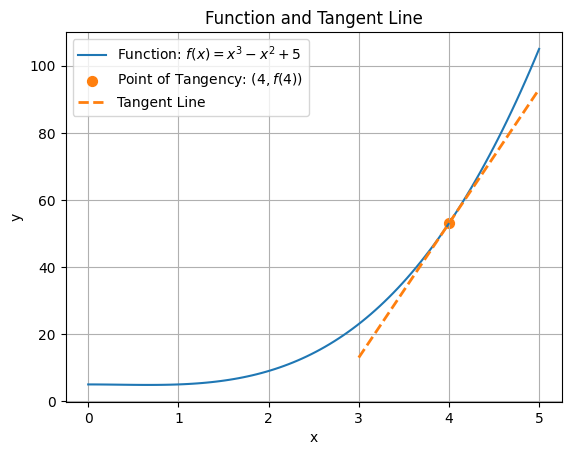

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """
    Calculate the function value for the given x.

    Parameters:
    x (float): The input value for the function.

    Returns:
    float: The value of the function at the given input.
    """
    return x**3 - x**2 + 5

def slope(x):
    """
    Calculate the slope of the function at a given x.

    Parameters:
    x (float): The input value for which the slope needs to be calculated.

    Returns:
    float: The slope of the function at the given input.
    """
    return 3*x**2 - 2*x

def line(x, x1, y1):
    """
    Calculate the y-values of a line with a given slope passing through a point (x1, y1).

    Parameters:
    x (array-like): Array of x-values at which to calculate y-values of the line.
    x1 (float): x-coordinate of the point through which the line passes.
    y1 (float): y-coordinate of the point through which the line passes.

    Returns:
    array-like: The y-values of the line at the given x-values.
    """
    return slope(x1)*(x - x1) + y1

# Generate an array of x values for plotting the function and tangent line
x = np.linspace(0, 5, 100)

# Define the x-coordinate of the point of tangency
x1 = 4

# Calculate the corresponding y-coordinate of the point of tangency using the function f(x)
y1 = f(x1)

# Generate x values for the tangent line range
xrange = np.linspace(x1 - 1, x1 + 1, 10)

# Create the plot
plt.figure()

# Plot the function f(x)
plt.plot(x, f(x), label="Function: $f(x) = x^3 - x^2 + 5$")

# Plot the point of tangency
plt.scatter(x1, y1, color='C1', s=50, label="Point of Tangency: $(4, f(4))$")

# Plot the tangent line
plt.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth=2, label="Tangent Line")

# Add title and labels to the axes
plt.title("Function and Tangent Line")
plt.xlabel("x")
plt.ylabel("y")

# Display the legend, grid, and the plot
plt.legend(loc="upper left")
plt.grid()
plt.show()


PLot the function f(x)  = x**3 - 2*x**2 + 5 and the tangent lines where f(x) has local minimums and maximums. Highlight the points where f(x) has local minimums and maximums. Add appropriate title and legends. Show the coordinates of the highlighted points in the plot.

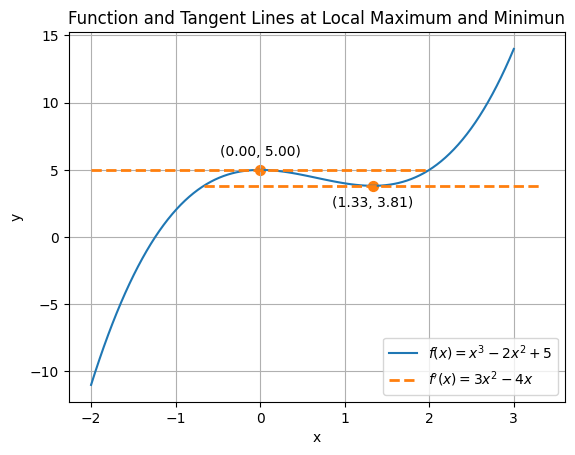

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve

# Define the function f(x)
def f(x):
    """
    Calculate the function value for the given x.

    Parameters:
    x (float): The input value for the function.

    Returns:
    float: The value of the function at the given input.
    """
    return x**3 - 2*x**2 + 5

# Define the derivatice of the function f(x)
def derivative(x):
    """
    Calculate the derivative of the function at a given x.

    Parameters:
    x (float): The input value for which the slope needs to be calculated.

    Returns:
    float: The slope of the function at the given input.
    """
    return 3*x**2 - 4*x

# Calculate the y-values of a line passing through a given point with a slope equals to the derivatife of the f(x)
def line(x, x1, y1):
    """
    Calculate the y-values of a line with a given slope passing through a point (x1, y1).

    Parameters:
    x (array-like): Array of x-values at which to calculate y-values of the line.
    x1 (float): x-coordinate of the point through which the line passes.
    y1 (float): y-coordinate of the point through which the line passes.

    Returns:
    array-like: The y-values of the line at the given x-values.
    """
    return derivative(x1)*(x - x1) + y1

# Generate an array of x values for plotting
X = np.linspace(-2, 3, 100)

# Create the plot
plt.figure()

# Plot the function f(x)
plt.plot(X, f(X), label="$f(x) = x^3 - 2x^2 + 5$")

# Solve the derivative of f(x) to get local maximums and minimuns
x1, x2 = solve(3*x**2 - 4*x)
y1 , y2 = f(x1), f(x2)

# Convert to float for plotting
x1, x2 = float(x1), float(x2)

# Generate x values for the tangent line ranges
xrange1 = np.linspace(x1 - 2, x1 + 2, 10)
xrange2 = np.linspace(x2 - 2, x2 + 2, 10)

# Plot tangent lines
plt.plot(xrange1, line(xrange1, x1, y1), 'C1--', linewidth=2, label= "$f'(x) = 3x^2 - 4x$")
plt.plot(xrange2, line(xrange2, x2, y2), 'C1--', linewidth=2) # No need for another legend entry

# Plot tangent points
plt.scatter(x1, y1, color='C1', s=50)
plt.annotate('(%1.2f, %1.2f)' % (x1, y1), xy=(x1, y1), textcoords='offset points', xytext=(0,10), ha='center')
plt.scatter(x2, y2, color='C1', s=50)
plt.annotate('(%1.2f, %1.2f)' % (x2, y2), xy=(x2, y2), textcoords='offset points', xytext=(0,-15), ha='center')

# Add title and labels to the axes
plt.title("Function and Tangent Lines at Local Maximum and Minimun")
plt.xlabel("x")
plt.ylabel("y")

# Display the legend, grid, and the plot
plt.legend(loc="lower right")
plt.grid()
plt.show()


Create a bar plot using the file 'data_27patient_data.csv'. For each disease I would like to see the average age, weight, height and body mass index of patients grouped by gender. Set a different color for each combination of gender and metric and display them in a legend. Be sure that the lengend do not overlap with any bar and that the x-axis label are displayed horizontally.

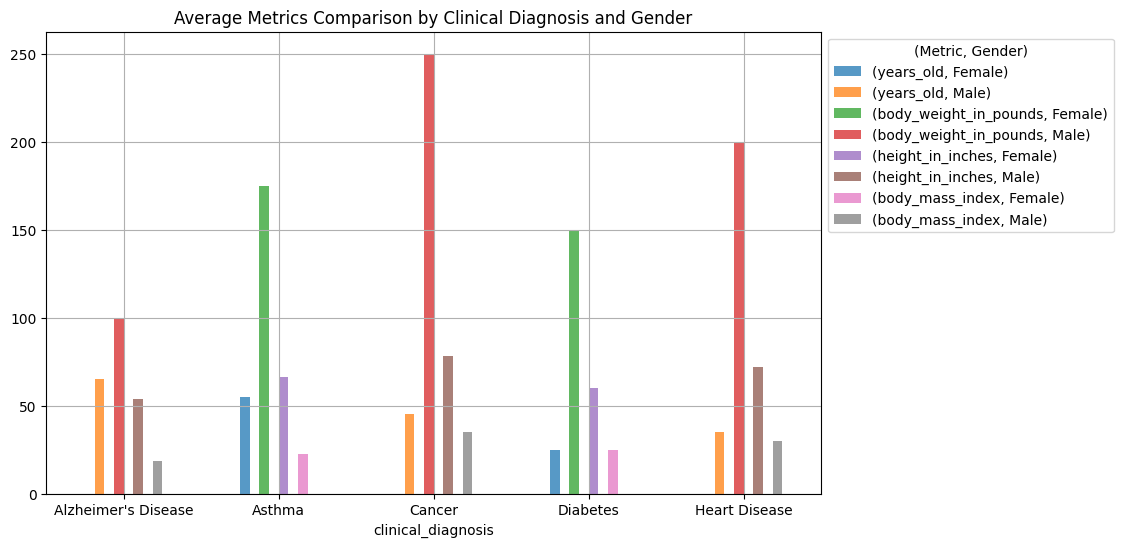

In [ ]:
# Import libraries
import pandas as pd

# Load the dataset from a specified path
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

# Get unique genders and diseases from the dataset
genders = df['biological_sex'].unique()
diseases = df['clinical_diagnosis'].unique()

# Group the dataset by clinical diagnosis and biological sex, then calculate the mean of numeric features
df_average = df.groupby(['clinical_diagnosis', 'biological_sex']).mean(numeric_only=True).reset_index()

# Pivot the average data for easier visualization
pivot_table = df_average.pivot(index='clinical_diagnosis', columns='biological_sex', values=['years_old', 'body_weight_in_pounds', 'height_in_inches', 'body_mass_index'])

# Create a bar plot for the pivot table
ax = pivot_table.plot(kind='bar', figsize=(10, 6), alpha=0.75, rot=0, grid=True)

# Set a descriptive title for the plot
ax.set_title('Average Metrics Comparison by Clinical Diagnosis and Gender')

# Move the legend outside the plot area to avoid overlap
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set the legend title
ax.get_legend().set_title("(Metric, Gender)")


Using this data:
ent_identifier	years_old	biological_sex	body_weight_in_pounds	height_in_inches	body_mass_index	medical_case_identifier	length_of_followup_in_months	clinical_diagnosis
12345	25	Female	150	60	25.0	67890	12	Diabetes
45678	35	Male	200	72	30.0	98765	24	Heart Disease
78901	45	Male	250	78	35.0	12345	36	Cancer
90123	55	Female	175	66	22.5	45678	48	Asthma
10234	65	Male	100	54	18.5	78901	60	Alzheimer's Disease
Please make a histogram of the age of patients. Each histogram bar should be divided into two sections with distinct colors representing male and female patients. Add an appropriate title and choose convinient number of bins for clarity in the visualization. Finally, add a legend to see what each color represents.

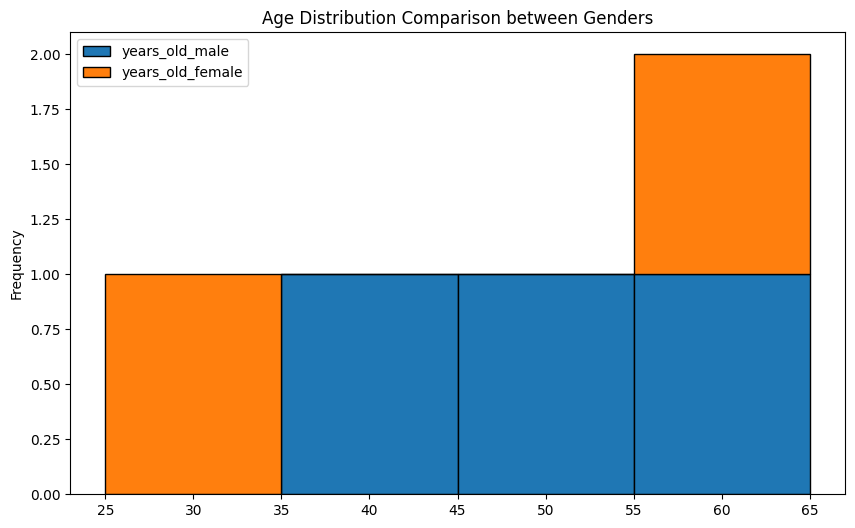

In [ ]:
import pandas as pd

# Load the dataset from a specified path
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

# Extract age data for males and females
df_age_male = df.loc[df['biological_sex'] == 'Male', ['years_old']].reset_index(drop=True)
df_age_female = df.loc[df['biological_sex'] == 'Female', ['years_old']].reset_index(drop=True)

# Rename columns for clarity
df_age_male.rename(columns={"years_old": "years_old_male"}, inplace=True)
df_age_female.rename(columns={"years_old": "years_old_female"}, inplace=True)

# Combine male and female age data
df = pd.concat([df_age_male, df_age_female], axis=1)

# Create a stacked histogram plot for age distribution
ax = df.plot.hist(stacked=True, bins=4, figsize=(10, 6), grid=False, edgecolor='black')

# Set the title for the plot
ax.set_title('Age Distribution Comparison between Genders')

# Display the plot
plt.show()


Sure! Here you have a histogram that shows the age distribution comparison between genders for all the patients in the dataset.

[image of the query]

I hope this helps you!

From the information in this dataset, what is the most common desease that affects women with weight greater than 150?

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

# Filter by gender and weight
df = df[(df['biological_sex'] == 'Female') & (df['body_weight_in_pounds'] > 150)]

# Get the number of patients diagnosed with each disease
diseases_counts = df['clinical_diagnosis'].value_counts()

# Get the disease with highest patients count
most_common_disease = diseases_counts.index[0]

# Print the result
print(most_common_disease)


Asthma


Sure, the most common desease that affects women with weight greater than 150 is Asthma.

Based only on the information from the file data_27patient_data.csv, if a patient has been diagnosed with Cancer, what is the expected gender of that patient?

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

# Filter by disease
df = df[df['clinical_diagnosis'] == 'Cancer']

# Get the number of patients diagnosed with Cacer for each gender
gender_counts = df['biological_sex'].value_counts()

expected_gender = gender_counts.index[0]

print(expected_gender)



Male


For sure! Based on the information from the provided file, if a patient has been diagnosed with Cancer, their expected gender is male.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_27patient_data.csv")

In [ ]:
import pandas as pd
import plotly.express as px

# Assume you have a DataFrame df with columns 'Year', 'Industry', and 'Total_Movies_Released'
# Load your data or create a sample DataFrame
data = {
    'Year': [2010, 2010, 2011, 2011, 2012, 2012],
    'Industry': ['Hollywood', 'Bollywood', 'Hollywood', 'Bollywood', 'Hollywood', 'Bollywood'],
    'Total_Movies_Released': [100, 50, 110, 70, 120, 60]
}

df = pd.DataFrame(data)

# Create an interactive line plot using Plotly Express
fig = px.line(df, x='Year', y='Total_Movies_Released', color='Industry', title='Total Movies Released by Industry Each Year')

# Add hover data to show the total number of movies released by each industry that year
fig.update_traces(texttemplate='%{y}', textposition='top center')

# Add a dropdown button to show/hide industries
industry_list = df['Industry'].unique()
buttons = [dict(label=industry, method='update', args=[{'visible': [industry == ind for ind in industry_list]}, {'title': f'Total Movies Released by {industry} Each Year'}]) for industry in industry_list]
buttons.append(dict(label='All', method='update', args=[{'visible': [True] * len(industry_list)}, {'title': 'Total Movies Released by Industry Each Year'}]))

fig.update_layout(updatemenus=[{'active': 0, 'buttons': buttons}])

# Show the interactive plot
fig.show()


In [ ]:
# Create a Pandas DataFrame.
import pandas as pd
import numpy as np
technologies= {
    'Courses':["Spark","PySpark","Spark","Python","PySpark"],
    'Fee' :[22000,25000,23000,24000,26000],
    'Duration':['30days','50days','30days','60days','35days']
          }
df = pd.DataFrame(technologies)
print(df)
df.sort_values(['Courses','Fee'],ascending=False).groupby('Courses').head(1)

   Courses    Fee Duration
0    Spark  22000   30days
1  PySpark  25000   50days
2    Spark  23000   30days
3   Python  24000   60days
4  PySpark  26000   35days


,Courses,Fee,Duration
2,Spark,23000,30days
3,Python,24000,60days
4,PySpark,26000,35days


In [ ]:
df.groupby(["Courses"])["Fee"].nlargest(3)

Courses   
PySpark  4    26000
         1    25000
Python   3    24000
Spark    2    23000
         0    22000
Name: Fee, dtype: int64

In [ ]:
df.groupby(['Courses'])['Fee'].sum().sort_values(ascending=False).head(3)

Courses
PySpark    51000
Spark      45000
Python     24000
Name: Fee, dtype: int64

In [ ]:
df.groupby(['Fee']).apply(lambda x: x.sort_values(['Courses'], ascending=False).head(3).drop('Fee', axis=1))

<ipython-input-140-aa2ee3412558>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby(['Fee']).apply(lambda x: x.sort_values(['Courses'], ascending=False).head(3).drop('Fee', axis=1))


,Courses,Duration
0,Spark,30days
1,PySpark,50days
2,Spark,30days
3,Python,60days
4,PySpark,35days
